In [2]:
library(ggplot2)
library("DESeq2")
library(tibble)
library(ggpubr)
library(ggsci)
require("ggrepel")
library(tidyverse)
library(ggExtra)
library("ggsci")

,C01,C02,C03,C04,C05,C06,C07,C09,C10,C100,⋯,H87,H89,H91,H92,H93,H95,H96,H97,H98,H99
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSRNA049458957,1.4258540,2.9574780,2.8948215,0.9957748,2.518353,0.65059473,0.3881032,3.0441321,1.3254424,0.8210651,⋯,1.0076072,1.9983064,0.4761254,0.1018118,0.8068001,1.7614579,1.4775020,0.9423133,1.0332823,0.7153993
ENSRNA049459076,2.0595668,3.7276545,3.6250468,2.0368120,3.597647,0.65059473,0.5544331,2.2964505,1.1426228,0.7115897,⋯,0.7557054,2.3313575,0.5158025,0.5090592,0.5826890,1.5412757,1.6006272,0.4916417,0.8345742,0.8942491
ENSRNA049459101,1.4575396,1.7868096,2.9469805,1.8557621,2.203558,0.78071368,0.3326598,1.1749282,0.7312786,0.4926390,⋯,0.5038036,1.6652553,0.5158025,0.2545296,1.5239558,0.6165103,1.3133351,0.1229104,0.6756077,0.6706868
ENSRNA049459156,1.8694530,3.9433040,3.5468084,3.7567866,2.923088,2.08190315,0.8870929,3.7384078,0.9140982,1.3137041,⋯,0.9446318,2.4978830,0.7141880,0.2545296,0.5378668,2.4220047,1.2722934,1.2291043,1.2717321,1.2072363
ENSRNA049463813,0.6337129,0.2464565,0.1043179,0.8599873,0.539647,0.06505947,0.0000000,0.7476816,0.2742295,0.6021144,⋯,0.9446318,4.9624609,2.6980437,0.1527178,0.6275112,0.0000000,6.2793836,0.2867910,1.2717321,5.6784817
ENSRNA049465110,1.1089975,1.8484237,2.1385168,3.8925741,1.843794,2.66743841,2.7167221,2.6702913,1.0969179,1.5326548,⋯,0.5352913,0.5661868,0.5554796,0.4581533,0.5826890,0.4403645,0.4514589,0.4506716,0.3576746,0.2235623


,Genotype,ZLname,Group,Common
,<fct>,<fct>,<fct>,<int>
1,1538,ZL001,iodent,1
2,2369,ZL002,stiff_stalk,2
3,2MA22,ZL003,non_stiff_stalk,3
4,33-16,ZL004,unknown,4
5,3IJI1,ZL005,iodent,5
6,4226,ZL006,unknown,6


Warning message in ifelse(grepl("C", Feature), as.integer(str_replace(Feature, "C", :
“NAs introduced by coercion”
Warning message in ifelse(grepl("C", Feature), as.integer(str_replace(Feature, "C", :
“NAs introduced by coercion”


,Feature.x,PC1,PC2,PC3,stress,newstress,Common,Feature.y,ZLname,Group,NewGroup
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<fct>,<fct>,<fct>,<chr>
1,C01,30.24627,-75.444136,24.1016678,Control,Control,1,1538,ZL001,iodent,iodent
2,C02,43.65720,-55.354122,-38.7551210,Control,Control,2,2369,ZL002,stiff_stalk,stiff_stalk
3,C03,37.97542,-10.663190,29.8790203,Control,Control,3,2MA22,ZL003,non_stiff_stalk,non_stiff_stalk
4,C04,66.84455,45.212903,-0.9752183,Control,Control,4,33-16,ZL004,unknown,unknown
5,C05,58.03684,-10.986423,56.5359493,Control,Control,5,3IJI1,ZL005,iodent,iodent
6,C06,38.70004,6.838008,-3.5369558,Control,Control,6,4226,ZL006,unknown,unknown


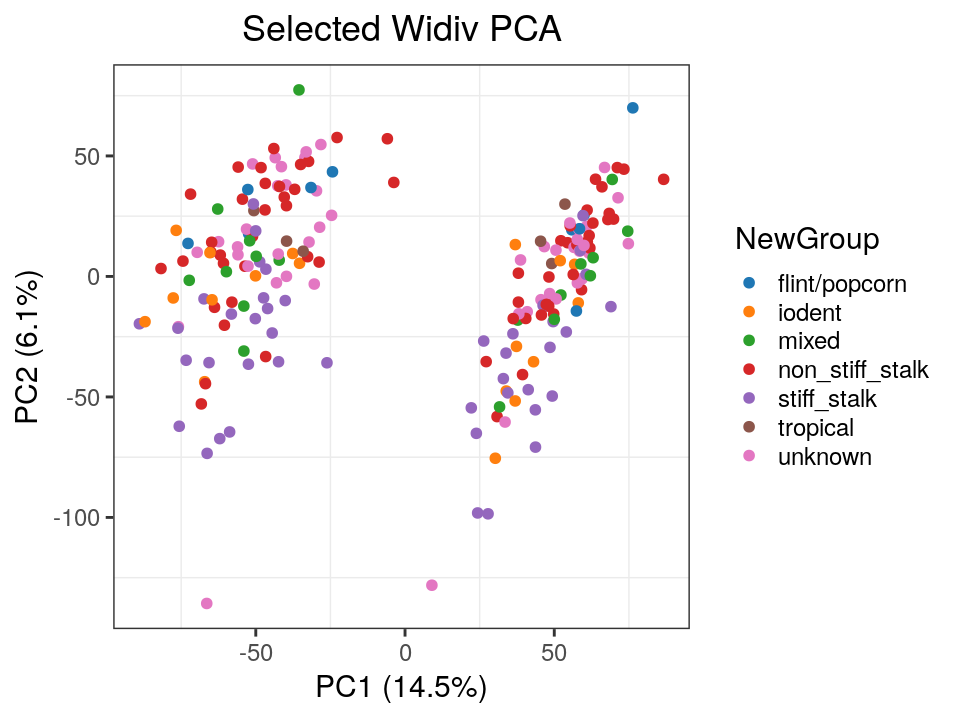

In [5]:
#Plotting PCA plot using expression data of genotypes

totalfpmcount = read.table("Widiv-CPM-expressed-gene.txt")
head(totalfpmcount)
#>>>>>>>>>>>>>>For expression data>>>>>>>>>>>>>>>>
tmp = totalfpmcount[rowMeans(totalfpmcount) > 1,]
expfpm = tmp %>% rownames_to_column(var="Feature") %>% filter(!Feature %in% c("C24","H24","C106","H106")) %>% column_to_rownames(var="Feature")
fit = prcomp(t(log2(expfpm+1)), scale=TRUE)
# meta generation
ori_meta = read.table("GeneCounts/ZLname-SelectedWidiv.txt",sep='\t',head=T)
widiv = read.table("PCAplot/Widiv-Class-information.txt")
colnames(widiv) = c("Genotype","Group")
meta = ori_meta %>% left_join(widiv, by="Genotype") %>% 
    mutate(Common = as.integer(str_replace(ZLname, "ZL", ""))) 
head(meta)
b73 = c("C106", "C24", "C66", "H106", "H24", "H66")
colnames(meta)[1] = "Feature"
mypc = data.frame(fit$x[,c(1,2,3)]) %>% rownames_to_column(var="Feature") %>% 
    mutate(stress= ifelse(grepl("C",Feature),"Control","Heat")) %>% mutate(newstress = ifelse(Feature %in% b73, "B73", stress)) %>% 
    mutate(Common = ifelse(grepl("C",Feature),as.integer(str_replace(Feature, "C", "")),as.integer(str_replace(Feature, "H", "")))) %>%
    left_join(meta, by="Common") %>% mutate(NewGroup = ifelse(Group == 'sweet_corn', 'unknown', as.character(Group)))
head(mypc)
options(repr.plot.width=8, repr.plot.height=6)
x = ggscatter(mypc, x = "PC1", y = "PC2", color="NewGroup", size = 2.6)+ scale_color_d3()+theme_bw(base_size = 18) + ggtitle("Selected Widiv PCA") + 
    theme(panel.grid.major=element_blank(),plot.title = element_text(hjust = 0.5)) + xlab("PC1 (14.5%)") + ylab("PC2 (6.1%)")
x

Warning message in ifelse(startsWith(Taxa, "C"), as.integer(str_replace(Taxa, "C", :
“NAs introduced by coercion”
Warning message in ifelse(startsWith(Taxa, "C"), as.integer(str_replace(Taxa, "C", :
“NAs introduced by coercion”


,Geno,NPQcontrol,YIIcontrol,YNOcontrol,NPQheat,YIIheat,YNOheat,V1,diffNPQ,diffYNO,diffYII,Control,Heat,diff,code
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,-0.065617983,0.069218620,-0.006892530,-0.03490164,0.045096622,-0.01331787,4226,0.03071634,-0.006425343,-0.02412200,30.24627,-67.12167,97.36795,medium
2,10,-0.034887354,0.029112445,0.003701722,0.01831965,0.005048528,-0.02784545,B73,0.05320700,-0.031547174,-0.02406392,23.89337,-66.30451,90.19788,medium
3,100,-0.057836918,0.050316105,0.009666526,-0.07353992,0.031417606,0.04485324,Pa405,-0.01570300,0.035186716,-0.01889850,61.06669,-55.89681,116.96350,large
4,101,-0.013381931,0.052072580,-0.038630795,-0.01978374,0.041429630,-0.02294213,PHJ90,-0.00640181,0.015688661,-0.01064295,33.90346,-50.09307,83.99654,small
5,104,-0.015768776,-0.003841869,0.023376733,0.02648402,-0.036772392,0.01010099,PHW80,0.04225279,-0.013275743,-0.03293052,55.87763,-72.70669,128.58432,large
6,105,-0.004729618,-0.007647564,0.015898439,0.04894928,-0.039207749,-0.01126310,PHW86,0.05367890,-0.027161537,-0.03156018,46.66228,-39.87489,86.53717,small


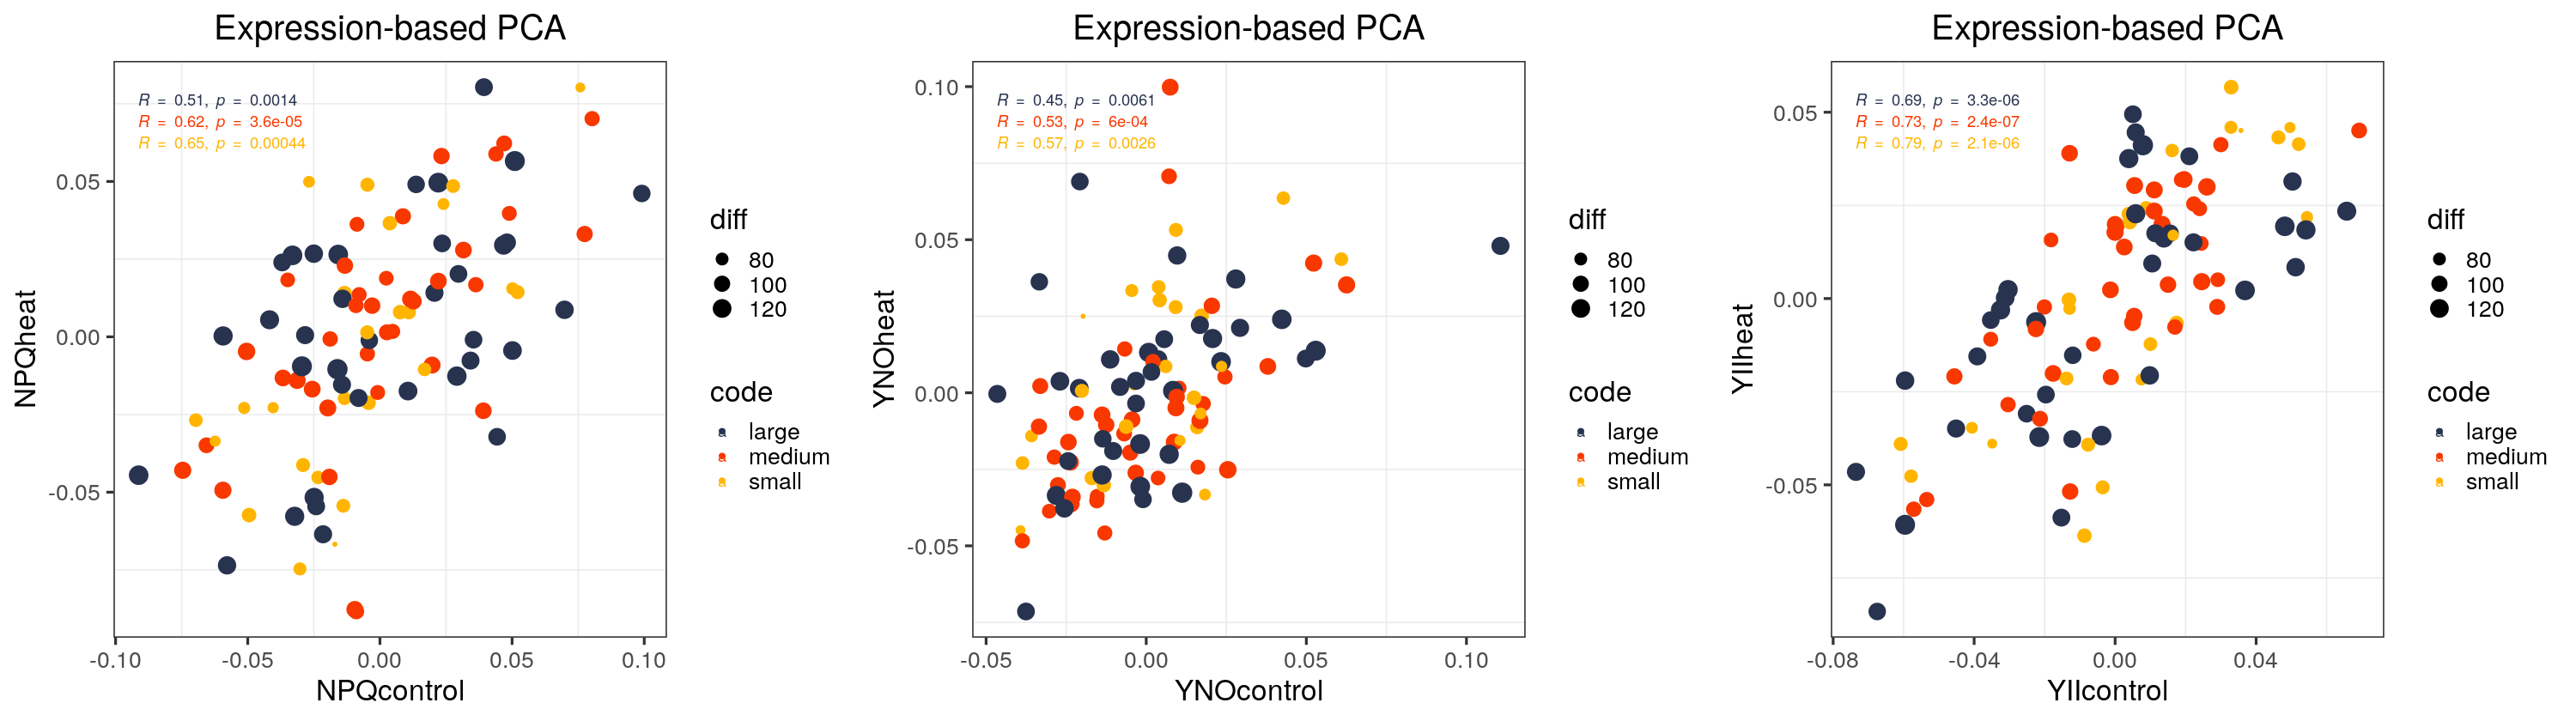

In [15]:
# plotting correlations between phenotype and transcriptome

pheno = read.table("2021JunEntireAnalysis/Phenotype/Widiv-control-heat-phenotype-BLUPs.txt",head=T)
pheno1 = pheno %>% mutate(diffNPQ = NPQheat-NPQcontrol,
                         diffYNO = YNOheat-YNOcontrol,
                         diffYII = YIIheat-YIIcontrol) %>% select(Geno, diffNPQ, diffYNO, diffYII) %>% gather(trait, value, -Geno)
pheno2 = pheno %>% mutate(diffNPQ = NPQheat-NPQcontrol,
                         diffYNO = YNOheat-YNOcontrol,
                         diffYII = YIIheat-YIIcontrol)

npq = pheno %>% select(Geno, NPQcontrol, NPQheat) %>% gather(trait, value, -Geno)
yii = pheno %>% select(Geno, YIIcontrol, YIIheat) %>% gather(trait, value, -Geno)
yno = pheno %>% select(Geno, YNOcontrol, YNOheat) %>% gather(trait, value, -Geno)

pc = read.table("PCAplot/Selected-102genos-Widiv-filtered-PCA-first3PC.txt",head=T)
pcdata = pc %>% rownames_to_column(var="Taxa") %>% 
    mutate(Geno = ifelse(startsWith(Taxa, "C"), 
                         as.integer(str_replace(Taxa, "C", "")),
                        as.integer(str_replace(Taxa, "H", ""))),
          Condition = ifelse(startsWith(Taxa, "C"),"Control","Heat")) %>% select(-Taxa,-PC2,-PC3)%>%
    spread(Condition, PC1) %>% mutate(diff = abs(Heat-Control))

data3 = pheno2 %>% left_join(pcdata, by="Geno") %>% drop_na() %>% 
    mutate(code=ifelse(diff < 90, "small", 
                      ifelse(diff >= 90 & diff < 110, "medium", "large")))
head(data3)
library(wesanderson)
x1 = ggscatter(data3, "NPQcontrol", "NPQheat", size="diff", color="code",
              palette = c("#283350", "#f93800", "#ffb500"))+stat_cor(aes(color = code))+theme_bw(base_size = 20) + ggtitle("Expression-based PCA") + 
    theme(panel.grid.major=element_blank(),plot.title = element_text(hjust = 0.5))
x2 = ggscatter(data3, "YNOcontrol", "YNOheat", size="diff", color="code",
              palette = c("#283350", "#f93800", "#ffb500"))+stat_cor(aes(color = code))+theme_bw(base_size = 20) + ggtitle("Expression-based PCA") + 
    theme(panel.grid.major=element_blank(),plot.title = element_text(hjust = 0.5))
x3 = ggscatter(data3, "YIIcontrol", "YIIheat", size="diff", color="code",
              palette = c("#283350", "#f93800", "#ffb500"))+stat_cor(aes(color = code))+theme_bw(base_size = 20) + ggtitle("Expression-based PCA") + 
    theme(panel.grid.major=element_blank(),plot.title = element_text(hjust = 0.5))
options(repr.plot.width=25, repr.plot.height=7)
combine = ggarrange(x1,x2,x3,nrow=1)
combine

,Gene,CPM,Condition,Genotype
,<chr>,<dbl>,<chr>,<chr>
1,ENSRNA049458957,1.4258540,Control,G1
2,ENSRNA049459076,2.0595668,Control,G1
3,ENSRNA049459101,1.4575396,Control,G1
4,ENSRNA049459156,1.8694530,Control,G1
5,ENSRNA049463813,0.6337129,Control,G1
6,ENSRNA049465110,1.1089975,Control,G1


Gene,ratioMedian,quant
<chr>,<dbl>,<dbl>
Zm00001d000023,0.3420569,0.123889433
Zm00001d000035,0.4819143,0.112197360
Zm00001d000112,0.7876226,0.177331838
Zm00001d000143,0.8745545,0.114383136
Zm00001d000170,0.4132229,0.009117734
Zm00001d000229,0.8964587,0.349780093


[1] 2628    3

,Gene,Genotype,Control,Heat,ratio
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,ENSRNA049458957,G1,1.4258540,1.2366475,-0.11715477
2,ENSRNA049458957,G10,1.3254424,1.0914902,-0.15297398
3,ENSRNA049458957,G100,0.8210651,0.6762239,-0.11956757
4,ENSRNA049458957,G101,2.4201168,2.6586198,0.09725390
5,ENSRNA049458957,G104,2.9022370,2.2651573,-0.25714888
6,ENSRNA049458957,G105,0.9422972,0.8291422,-0.08659673


Warning message:
“Removed 8983 rows containing missing values (geom_text_repel).”


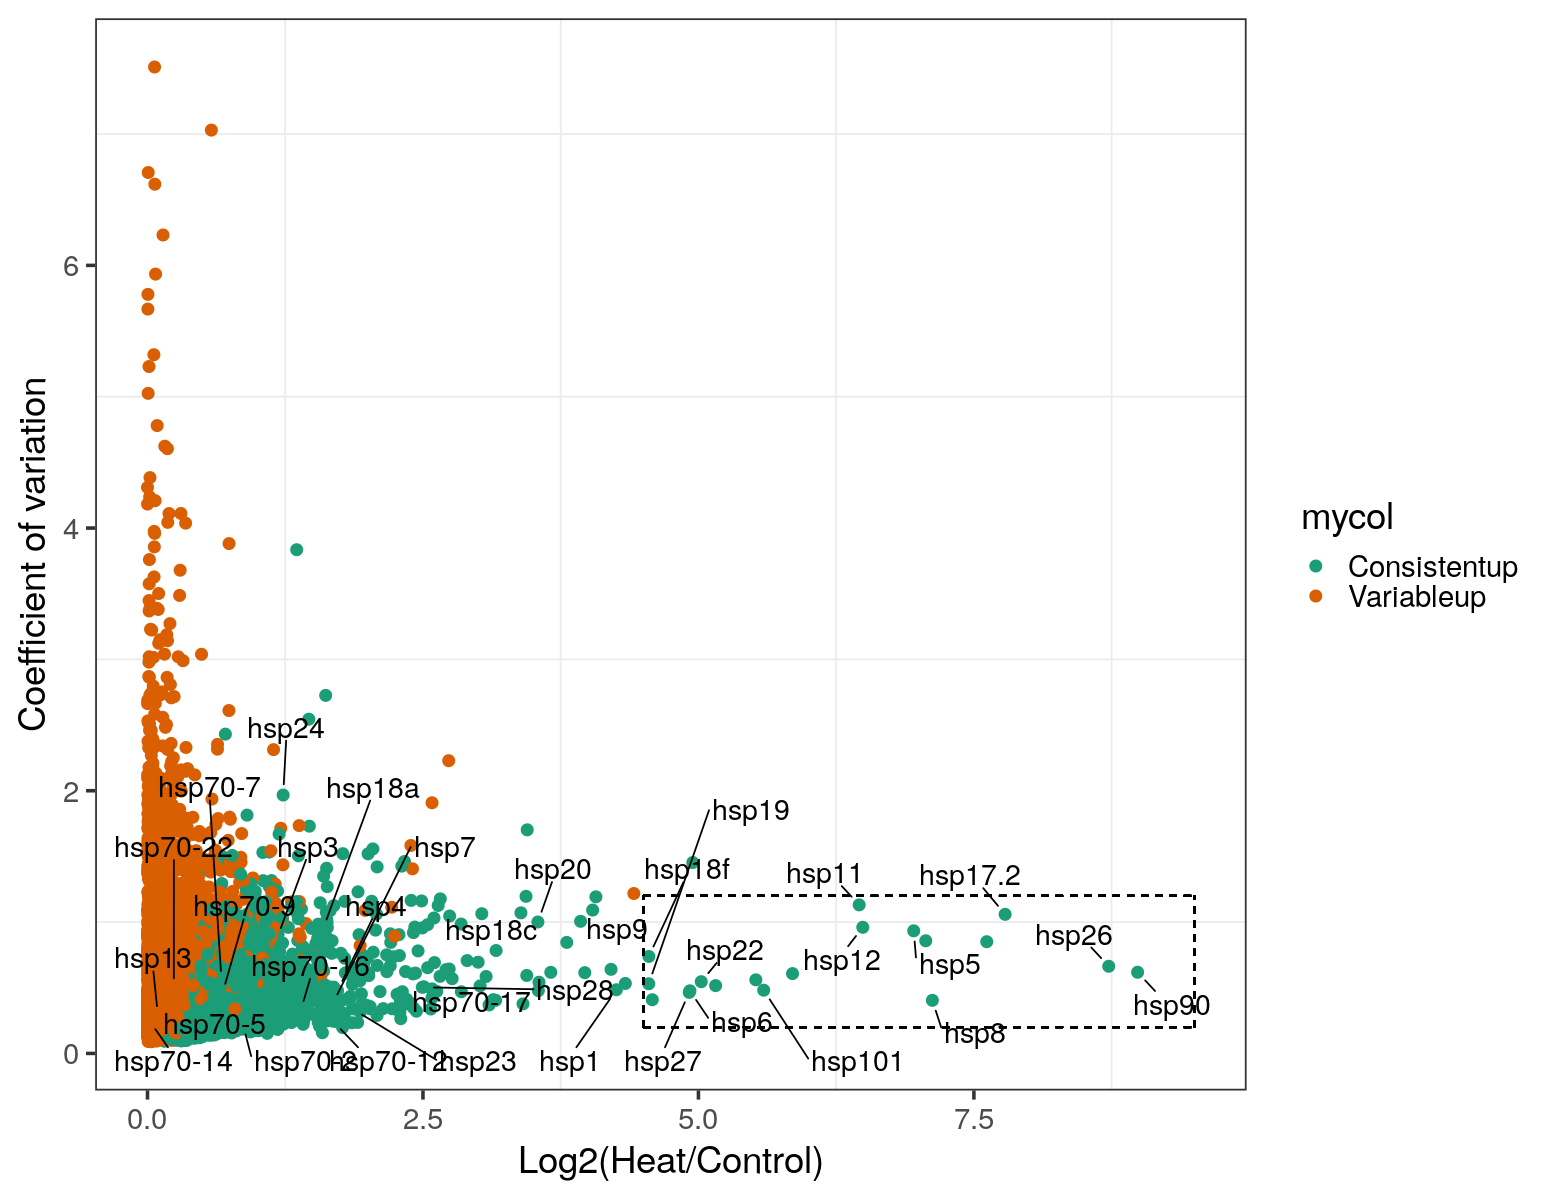

In [8]:
#plotting consistent upregulated genes vs variable upregulated genes.  

x = read.table("Widiv-CPM-expressed-gene.txt",head=T)
exptotalfpm = x %>% rownames_to_column(var="Gene") %>% gather(key="Code",value="CPM",-Gene) %>% 
    mutate(Condition = ifelse(startsWith(Code, "C"),"Control","Heat")) %>% 
    mutate(Genotype = ifelse(startsWith(Code, "C"),str_replace(Code, "C", ""),str_replace(Code, "H", ""))) %>% 
    mutate(Genotype = paste('G',as.character(as.integer(Genotype)),sep='')) %>% select(-Code)
head(exptotalfpm)

popup = exptotalfpm %>% spread(Condition, CPM) %>% mutate(ratio = log2((Heat+1)/(Control+1))) %>% 
    group_by(Gene) %>% mutate(ratioMedian = median(ratio), quant = quantile(ratio, probs=0.1)) %>% ungroup() %>% 
    select(Gene, ratioMedian, quant) %>% distinct() %>% filter(ratioMedian > 0, quant > 0)
head(popup)
dim(popup)

# calculating ratio between Control vs. Heat for HSF plotting 
x = read.table("Widiv-CPM-expressed-gene.txt",head=T)
#===HSP=====
HSP = read.table("HSFs//HSPs-list-B73v4.txt",sep='\t',head=F)
colnames(HSP)[1:2] = c("Gene","hsp")
HSP$Gene = as.character(HSP$Gene)
HSP = HSP %>% select("Gene","hsp")
#===HSF====
SRhsf = read.table("HSFs/SRHSF-table.tsv",sep='\t',head=F)
colnames(SRhsf)[1] = "HSF"
colnames(SRhsf)[2] = "Gene"
hsf = SRhsf[,c(1,2)]
#====total expressed genes============
exptotalfpm = x %>% rownames_to_column(var="Gene") %>% gather(key="Code",value="CPM",-Gene) %>% 
    mutate(Condition = ifelse(startsWith(Code, "C"),"Control","Heat")) %>% 
    mutate(Genotype = ifelse(startsWith(Code, "C"),str_replace(Code, "C", ""),str_replace(Code, "H", ""))) %>% 
    mutate(Genotype = paste('G',as.character(as.integer(Genotype)),sep='')) %>% select(-Code)

totalratio = exptotalfpm %>% spread(Condition, CPM) %>% mutate(ratio = log2((Heat+1)/(Control+1)))
head(totalratio)
columns1 = unique(totalratio$Genotype)
tmean = exptotalfpm %>% spread(Condition, CPM) %>% mutate(ratio = log2((Heat+1)/(Control+1))) %>% group_by(Gene) %>%
    mutate(FCmean = median(ratio), Heatmean = median(Heat)) %>% ungroup()

library(wesanderson)
tratio = totalratio %>% select(-Control, -ratio) %>% spread(Genotype, Heat) %>% column_to_rownames(var="Gene") %>%
  mutate(Mean= rowMeans(.[columns1]), stdev=rowSds(as.matrix(.[columns1])), cv=rowSds(as.matrix(.[columns1]))/rowMeans(.[columns1])) %>%
  rownames_to_column(var="Gene") %>% select(Gene, Mean, stdev, cv) %>% left_join(tmean, by="Gene") %>%
  select(Gene, cv, FCmean, Heatmean) %>% distinct() %>% filter(FCmean > 0) %>% 
  mutate(mycol = ifelse(Gene %in% popup$Gene, "Consistentup", "Variableup")) %>% left_join(HSP, by="Gene") %>% left_join(SRhsf, by="Gene")
options(repr.plot.width=13, repr.plot.height=10)
fig = ggscatter(tratio, "FCmean", "cv", col="mycol", size=3)+
   scale_color_brewer(palette="Dark2")+  
   theme_bw(base_size = 22) + 
    geom_text_repel(
        aes(label = hsp),
        size = 6, color="black",max.overlaps = Inf,
        box.padding = unit(0.8, "lines"),
        point.padding = unit(0.8, "lines")) +
    geom_segment(aes(x = 4.5, y = 0.2, xend = 4.5, yend = 1.2), color="black", linetype="dashed") + 
    geom_segment(aes(x = 4.5, y = 1.2, xend = 9.5, yend = 1.2), color="black", linetype="dashed") + 
    geom_segment(aes(x = 4.5, y = 0.2, xend = 9.5, yend = 0.2), color="black", linetype="dashed") +
    geom_segment(aes(x = 9.5, y = 0.2, xend = 9.5, yend = 1.2), color="black", linetype="dashed") +
    xlab("Log2(Heat/Control)") + ylab("Coefficient of variation") + 
    guides(fill=guide_legend(title="Log2(Heat CPM)"))+
    theme(panel.grid.major=element_blank(),plot.title = element_text(hjust = 0.5))
fig

,V1
,<fct>
1,ENSRNA049438546
2,ENSRNA049438710
3,ENSRNA049439367
4,ENSRNA049439996
5,ENSRNA049440629
6,ENSRNA049441066


,Gene,CPM,Condition,Genotype,HSF
,<chr>,<dbl>,<chr>,<chr>,<fct>
1,Zm00001d005888,4.784532,Control,G1,ZmHsf08
2,Zm00001d012749,11.977173,Control,G1,ZmHsf22
3,Zm00001d012823,20.880839,Control,G1,ZmHsf12
4,Zm00001d016255,7.129270,Control,G1,ZmHsf13
5,Zm00001d016520,27.534824,Control,G1,ZmHsf14
6,Zm00001d016674,9.442322,Control,G1,ZmHsf15


Gene,Genotype,HSF,Control,Heat,ratio
<chr>,<chr>,<fct>,<dbl>,<dbl>,<dbl>
Zm00001d005888,G1,ZmHsf08,4.7845322,11.0899360,1.06353442
Zm00001d005888,G10,ZmHsf08,2.0110161,9.0488059,1.73870175
Zm00001d005888,G100,ZmHsf08,1.1494911,4.2988522,1.30168474
Zm00001d005888,G101,ZmHsf08,1.4417717,3.7802250,0.96915021
Zm00001d005888,G104,ZmHsf08,1.2438158,2.2651573,0.54119824
Zm00001d005888,G105,ZmHsf08,0.7656165,0.8291422,0.05099525


Gene,Genotype,HSF,Control,Heat,ratio,Wilcox,mymedian
<chr>,<chr>,<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Zm00001d005888,G1,ZmHsf08,4.7845322,11.0899360,1.06353442,2.553873e-17,0.9609321
Zm00001d005888,G10,ZmHsf08,2.0110161,9.0488059,1.73870175,2.553873e-17,0.9609321
Zm00001d005888,G100,ZmHsf08,1.1494911,4.2988522,1.30168474,2.553873e-17,0.9609321
Zm00001d005888,G101,ZmHsf08,1.4417717,3.7802250,0.96915021,2.553873e-17,0.9609321
Zm00001d005888,G104,ZmHsf08,1.2438158,2.2651573,0.54119824,2.553873e-17,0.9609321
Zm00001d005888,G105,ZmHsf08,0.7656165,0.8291422,0.05099525,2.553873e-17,0.9609321


Picking joint bandwidth of 0.155



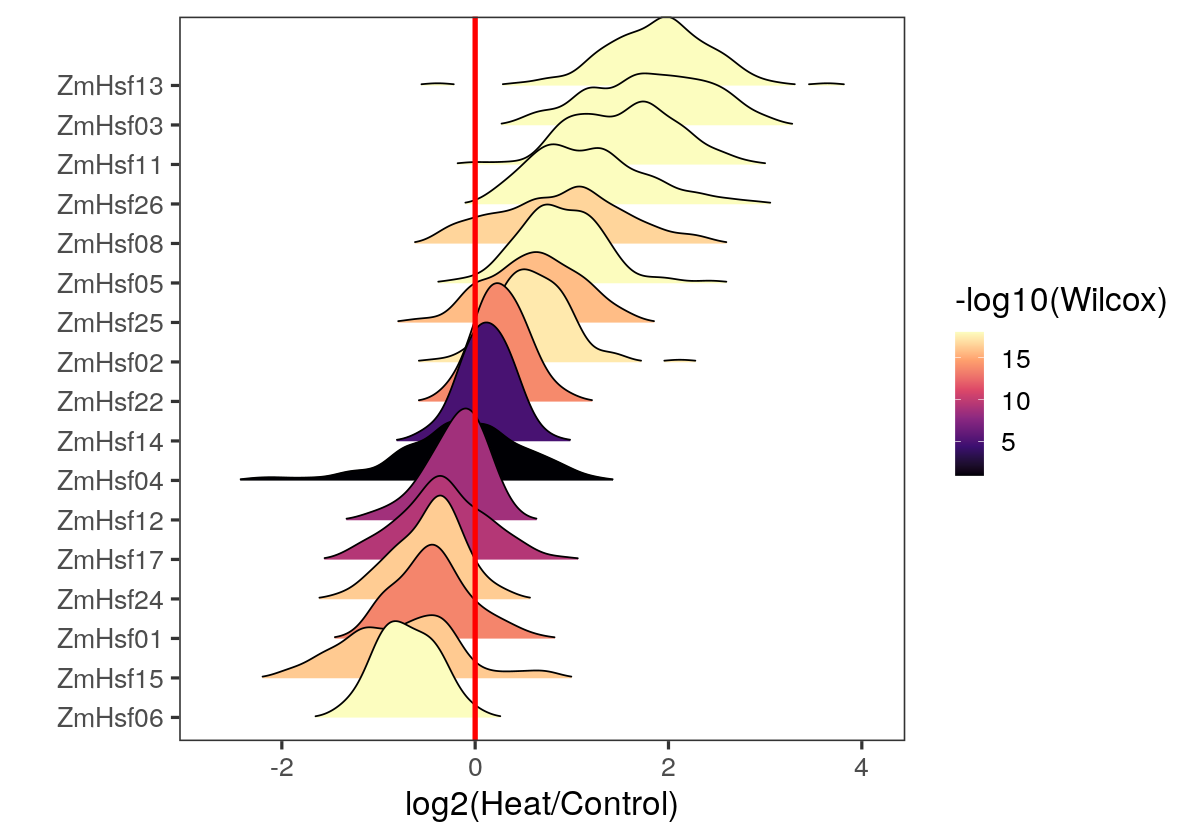

In [18]:
# plotting density plots for HSFs

library(ggridges)

# ======= HSF ==============
SRhsf = read.table("HSFs/SRHSF-table.tsv",sep='\t',head=F)
colnames(SRhsf)[1] = "HSF"
colnames(SRhsf)[2] = "Gene"
hsf = SRhsf[,c(1,2)]
# ======== HSP ==============
HSP = read.table("HSFs//HSPs-list-B73v4.txt",sep='\t',head=F)
colnames(HSP)[1:2] = c("Gene","hsp")
HSP$Gene = as.character(HSP$Gene)
HSP = HSP %>% select("Gene","hsp")

# ========== Genes with 2kb flanking regions are overlapped with heat-specific MOAseq ====
moagene = read.table("2021JunEntireAnalysis/eQTLmapping-Oct/reQTLs-Dec/allfinalreQTLs/compare-eGene-reGene/Genes2kb-overlap-diffMOApeaks.txt")
head(moagene)
# ==========
# calculating ratio between Control vs. Heat for HSF plotting 
x = read.table("Widiv-CPM-expressed-gene.txt",head=T)
exptotalfpm = x %>% rownames_to_column(var="Gene") %>% gather(key="Code",value="CPM",-Gene) %>% 
    mutate(Condition = ifelse(startsWith(Code, "C"),"Control","Heat")) %>% 
    mutate(Genotype = ifelse(startsWith(Code, "C"),str_replace(Code, "C", ""),str_replace(Code, "H", ""))) %>% 
    mutate(Genotype = paste('G',as.character(as.integer(Genotype)),sep='')) %>% select(-Code) %>% left_join(hsf, by="Gene") %>% drop_na()
head(exptotalfpm)
hsfratio = exptotalfpm %>% spread(Condition, CPM) %>% group_by(HSF, Genotype) %>% mutate(ratio = log2((Heat+1)/(Control+1))) %>% ungroup()
head(hsfratio)
hsfp = exptotalfpm %>% group_by(HSF) %>% 
       do(w = wilcox.test(CPM~Condition, data=., paired=TRUE)) %>% 
       summarise(HSF, Wilcox = w$p.value) %>% ungroup()

options(repr.plot.width=10, repr.plot.height=7)
hsfratio1 = hsfratio %>% left_join(hsfp, by="HSF")
hsfratio1$HSF = with(hsfratio1, reorder(HSF, ratio, median, order = TRUE))
hsfratio2 = hsfratio1 %>% group_by(HSF) %>% mutate(mymedian = median(ratio)) %>% ungroup()
head(hsfratio2)
figure = ggplot(hsfratio2, aes(x = ratio, y = HSF, fill = -log10(Wilcox))) +
  geom_density_ridges_gradient(scale = 3, rel_min_height = 0.01) + scale_fill_viridis_c(option = "magma")+
    theme_bw(base_size=20)+theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),
      strip.text.x = element_text(size = 8)
    )+geom_vline(xintercept = 0, color = "red", size=1.5) + xlab("log2(Heat/Control)") + ylab("")
figure